<a href="https://colab.research.google.com/github/bob8dod/ML-studying/blob/main/ML_DL/12_DL_Model_(history%2C_callbacks_EarlyStopping%2CCheckpointer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Using Package
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping #Using Callbacks for saving, earlystopping

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Seed setting
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#Data preprocessing
pre_df = pd.read_csv('./dataset/wine.csv', header=None)
df = pre_df.sample(frac=0.15) #Import only 15% of total data(because of a vast amount of Data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1


In [ ]:
data = df.values
X = data[:,0:12]
Y = data[:,12]

In [ ]:
#Model Making, Setting
model=Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#CheckPointer _ Saving record of model
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR): 
    os.mkdir(MODEL_DIR) #model 파일이 없다면 생성하기

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5" #저장 경로 및 제목설정

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
#EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=30) #if it's same during 30times, Stop Training

In [ ]:
#Save the training process for Graph
history = model.fit(X,Y,validation_split=0.2,epochs=500, batch_size=50, verbose=1, callbacks=[early_stop])# +checkpointer

Epoch 1/500
16/16 [==============================] - 1s 14ms/step - loss: 1.2373 - accuracy: 0.7124 - val_loss: 0.4576 - val_accuracy: 0.7795
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 0.6038 - accuracy: 0.7168 - val_loss: 0.4259 - val_accuracy: 0.8205
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.8622 - val_loss: 0.2654 - val_accuracy: 0.9026
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 0.3399 - accuracy: 0.9037 - val_loss: 0.2135 - val_accuracy: 0.9385
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 0.2881 - accuracy: 0.9186 - val_loss: 0.2329 - val_accuracy: 0.9179
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.2931 - accuracy: 0.9085 - val_loss: 0.1928 - val_accuracy: 0.9385
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 0.3179 - accuracy: 0.8985 - val_loss: 0.1895 - val_accuracy: 0.9231
Epoch 8/500


Epoch 59/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1609 - accuracy: 0.9567 - val_loss: 0.1544 - val_accuracy: 0.9641
Epoch 60/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1667 - accuracy: 0.9502 - val_loss: 0.1132 - val_accuracy: 0.9692
Epoch 61/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1624 - accuracy: 0.9487 - val_loss: 0.1206 - val_accuracy: 0.9692
Epoch 62/500
16/16 [==============================] - 0s 4ms/step - loss: 0.1688 - accuracy: 0.9548 - val_loss: 0.1255 - val_accuracy: 0.9692
Epoch 63/500
16/16 [==============================] - 0s 4ms/step - loss: 0.1611 - accuracy: 0.9562 - val_loss: 0.1058 - val_accuracy: 0.9692
Epoch 64/500
16/16 [==============================] - 0s 5ms/step - loss: 0.1512 - accuracy: 0.9559 - val_loss: 0.1153 - val_accuracy: 0.9692
Epoch 65/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1330 - accuracy: 0.9616 - val_loss: 0.1068 - val_accuracy: 0.9744
Epoch 

16/16 [==============================] - 0s 3ms/step - loss: 0.1456 - accuracy: 0.9598 - val_loss: 0.0740 - val_accuracy: 0.9846
Epoch 117/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0991 - accuracy: 0.9671 - val_loss: 0.0897 - val_accuracy: 0.9641
Epoch 118/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 0.9762 - val_loss: 0.0759 - val_accuracy: 0.9795
Epoch 119/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.9716 - val_loss: 0.0837 - val_accuracy: 0.9795
Epoch 120/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0885 - accuracy: 0.9753 - val_loss: 0.0761 - val_accuracy: 0.9846
Epoch 121/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0750 - accuracy: 0.9769 - val_loss: 0.0905 - val_accuracy: 0.9692
Epoch 122/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9767 - val_loss: 0.0724 - val_accuracy: 0.9846
Epoch 123/500

16/16 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9763 - val_loss: 0.0633 - val_accuracy: 0.9846
Epoch 174/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 0.9786 - val_loss: 0.0743 - val_accuracy: 0.9846
Epoch 175/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9791 - val_loss: 0.0660 - val_accuracy: 0.9897
Epoch 176/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9791 - val_loss: 0.0692 - val_accuracy: 0.9846
Epoch 177/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0743 - accuracy: 0.9792 - val_loss: 0.0678 - val_accuracy: 0.9897
Epoch 178/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.9794 - val_loss: 0.0712 - val_accuracy: 0.9897
Epoch 179/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9733 - val_loss: 0.0635 - val_accuracy: 0.9897
Epoch 180/500

16/16 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9803 - val_loss: 0.0968 - val_accuracy: 0.9692
Epoch 231/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9869 - val_loss: 0.0756 - val_accuracy: 0.9897
Epoch 232/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9859 - val_loss: 0.0737 - val_accuracy: 0.9846
Epoch 233/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9846 - val_loss: 0.0634 - val_accuracy: 0.9897
Epoch 234/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9887 - val_loss: 0.0597 - val_accuracy: 0.9897
Epoch 235/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9837 - val_loss: 0.0531 - val_accuracy: 0.9897
Epoch 236/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9765 - val_loss: 0.0546 - val_accuracy: 0.9897
Epoch 237/500

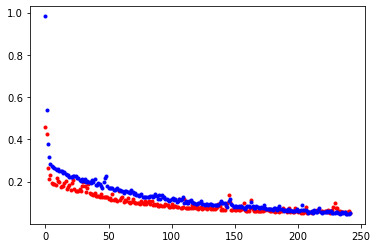

In [ ]:
#Showing on Graph
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_loss, "o", c="blue", markersize=3)
plt.show()